---


# Frame the Problem and Look at the Big Picture


---


This data is from the open source UCI repository datasets. The data consists of rows that are wines, where each columns represents the result of the chemical analysis of wines grown by the Portuguese "Vinho Verde" wine. The chemical analysis determined the quantities of 13 constituents found in each wine. The datasets contains red and white wines which will be merged and used as a feature to help predict wine quality.  

Link to UCI Repository: http://archive.ics.uci.edu/ml/datasets/Wine/ Data downloaded on 22nd July 2020.


---


# Objective of Project/business:



---





###### Which chemical composition contributes towards a better quality wine?
Build a machine learning model that can be used to help the vintner create a wine that is likely to be regarded as a high quality wine and achieve an accuracy score of 70%+.

##### Problem description:
###### Type of Problem
This is a supervised learning regression problem (later becoming a classification problem), with the target values being the quality column and 11no. features, discussed below.

###### Performance Metric
The peformance metric of the machine learning algorithm shall be the root mean square error (which is what I thought initially, it later became a classification problem, as explained later in the Notebook). The minimum performance needed to reach the business objective is 70% so that gives an increased probability a given wine ascertains a higher quality score.

###### Similiar projects
There are several comparable problems within the wine industry. However, this dataset is not large enough to warrant a deep learning model, so leading ensemble methods have been explored.

Attempts have also been made to visualize the data, where possible.



---


# Load Data


---





In [1]:
pip install heatmapz

In [2]:
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #pip install heatmapz
from heatmap import corrplot

red_df = pd.read_csv(url_red, sep= ';')
white_df = pd.read_csv(url_white, sep= ';')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
 red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
white_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
white_df.columns == red_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

---


# Explore Data

---


The wine datasets seems to be skewed towards the white wine compared to the red so once combined 1/4 of the dataset will be red. To avoid problems training the model on a biased dataset, Stratified sampling will be used to split the dataset equally.  

__Features__

The features for both the dataset are the same and are listed below, all the features a chemical compositions as mentioned before: 
<li>fixed acidity
<li>volatile acidity
<li>citric acid	residual
<li>sugar
<li>chlorides
<li>free sulfur dioxide
<li>total sulfur dioxide
<li>density
<li>pH
<li>sulphates
<li>alcohol

quality: The wine quality based on the Oenologist review.

Check for missing values, NaNs or outliers within the datasets.

In [6]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


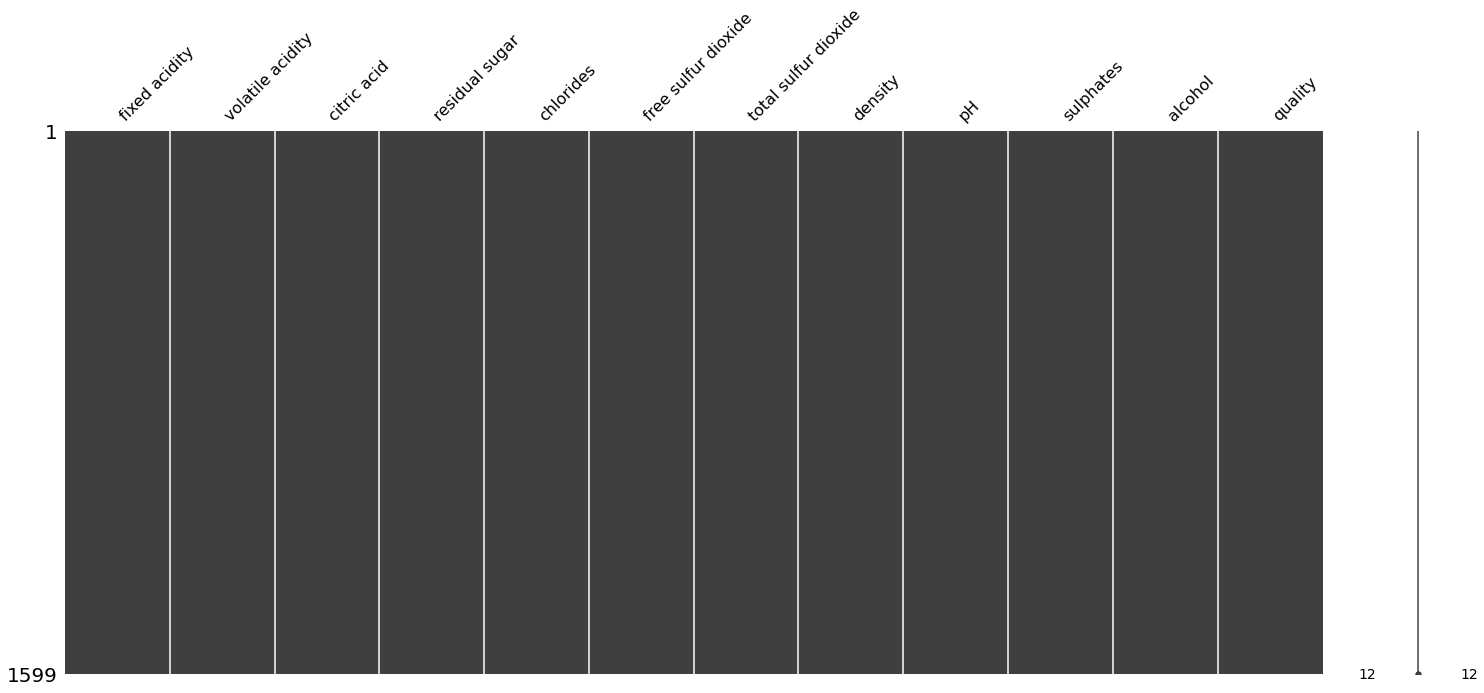

In [7]:
msno.matrix(red_df)

In [8]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


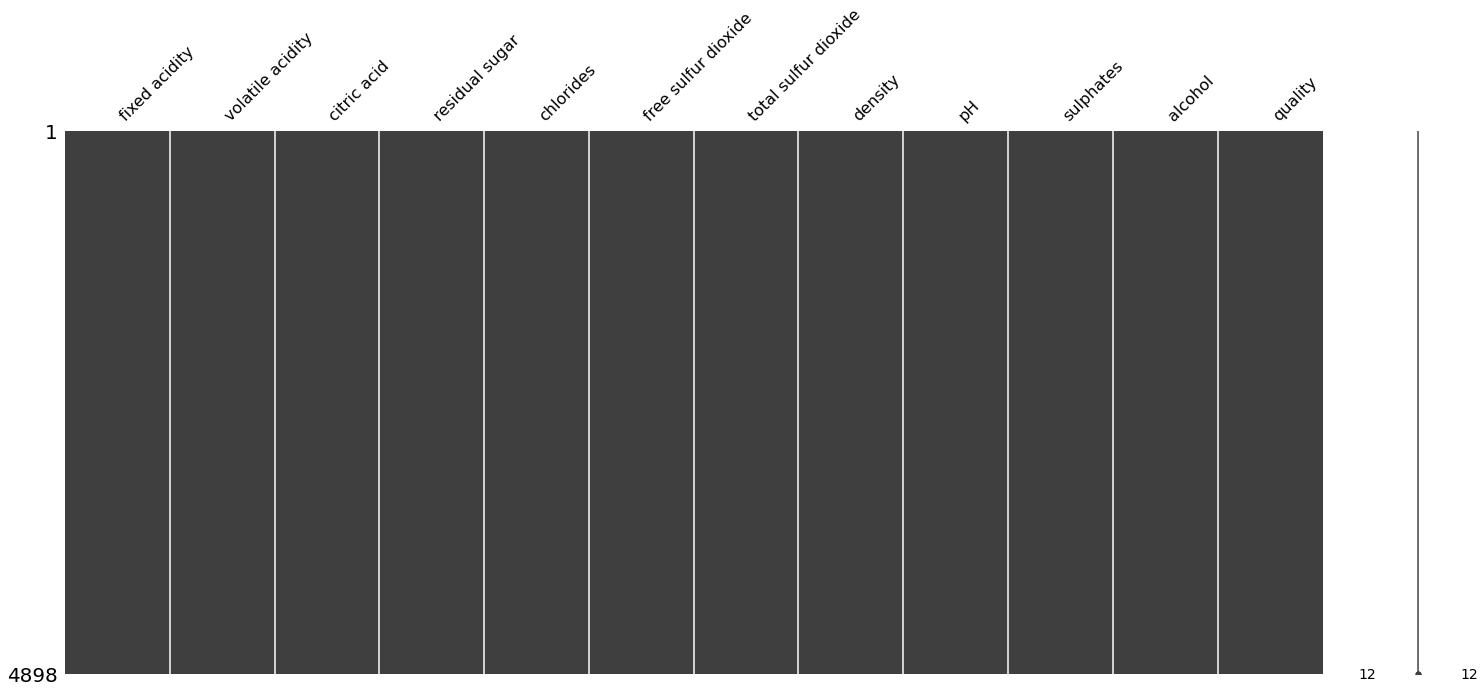

In [9]:
msno.matrix(white_df)

Combine Dataset and create new categorical feature based on the wine colour

In [10]:
#experiement with smaller dataset, create pipeline
(pd.concat([white_df[:5], red_df[:5]], axis=0, keys=['Red', 'White'], names=['wine_colour'])
 .reset_index()
)

,wine_colour,level_1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Red,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,Red,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,Red,2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,Red,3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,Red,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,White,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
6,White,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
7,White,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
8,White,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
9,White,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Combine Datasets

In [11]:
wine_df = (
    pd.concat([white_df, red_df], axis=0, keys=['Red', 'White'], names=['wine_colour'])
    .reset_index()
)
wine_df.drop(labels= 'level_1', axis=1, inplace=True)
wine_df

,wine_colour,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Red,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,Red,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,Red,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,Red,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,Red,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,White,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,White,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,White,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,White,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


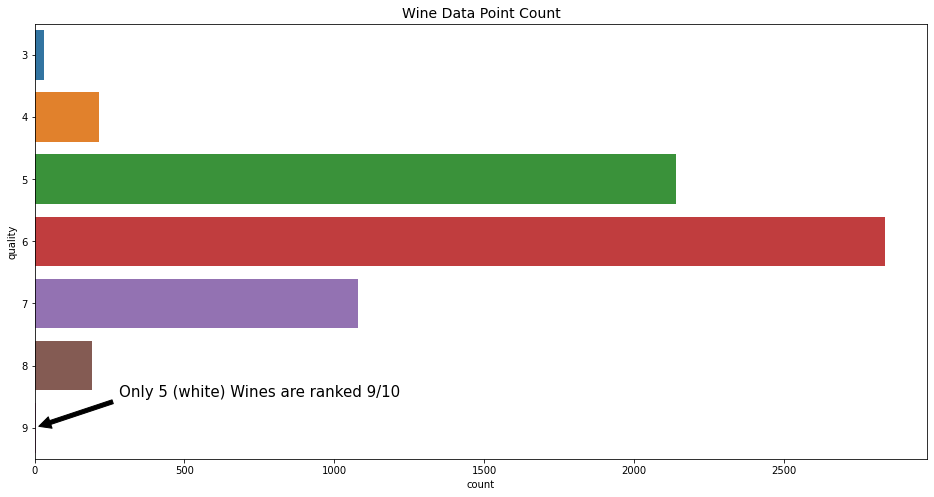

In [12]:
plt.figure(figsize=(16,8))
plt.title('Wine Data Point Count', fontsize=14)
sns.countplot(y='quality', data= wine_df)
plt.annotate('Only 5 (white) Wines are ranked 9/10', xy=(0,6), xytext=(750, 5.5), ha='center', fontsize=15,
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

### CROSS ROAD!! 

Well this could be either a classification problem or regression problem. There are not many high quality (i.e. 9/10) wines and they could be classified as outliers. With only 5 out of (4898 + 1599) 6497 instances this is very much the case, i.e. only 0.077%. Lets change our approach and consider this as a classification problem with 7 classes to predict (3, 4, 5, 6, 7, 8 and 9). 

We could change this classification problem further by ranking all wines above 7 are 'high quality' and below 7 as 'low quality'.

###### Correlation Plots

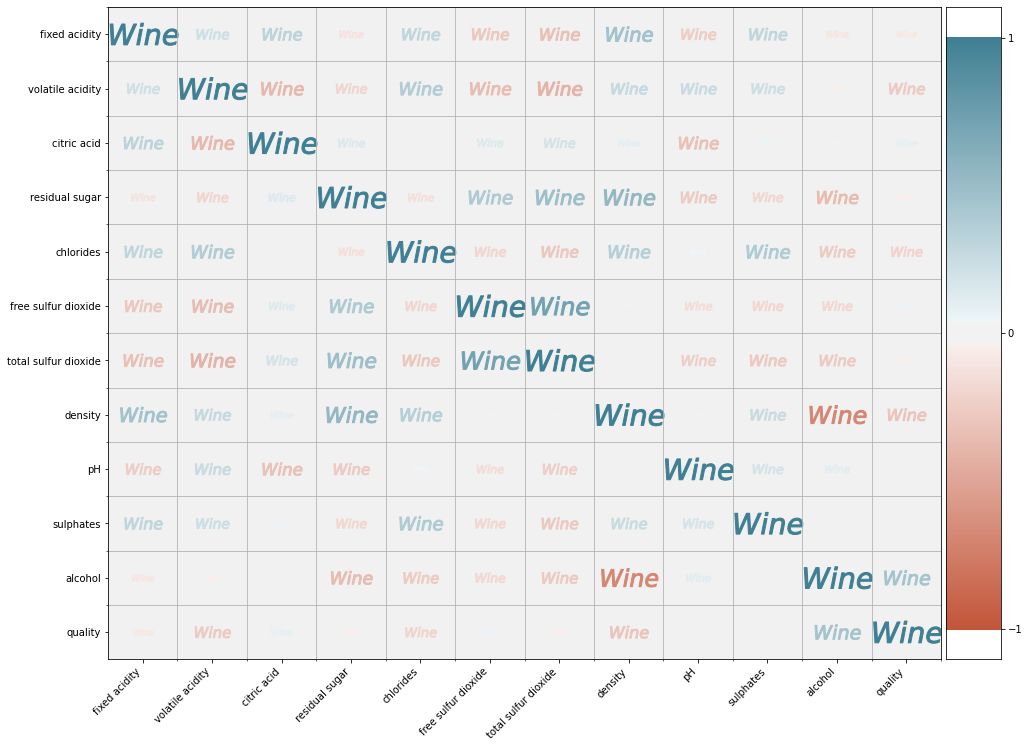

In [13]:
plt.figure(figsize=(16,12))
corrplot(wine_df.drop(labels='wine_colour', axis=1).corr(), size_scale=5000, marker='$Wine$')

The bigger and Blue the Wine the more correlated that feature is! We can see that there is a heavy correlation between alcohol and quality, with a small correlation with citric acid. There is negative correlation with density, chlorides, volatile acidity and fixed acidity against quality.

For now we will keep all the features are see how the model performs. If the model performance is not great we can drop features that are highly correlated - i.e. reduce collinearity. This will be the first step in the Feature engineering process, should be require it. 

### Probability Plot
The benefit of the probability plot is so we can determine the type of distribution is present within the data set. 

As the quality of the Wines are discrete values the quality is not normally distributed. I checked this by plotting the below plot multiple times using the following distributions: 
<li> Poisson
<li> Normal
<li> Uniform
<li> Bernoulli
<li> Planck</li>
    
There are many more distribution plots available at stats.distributions, instead of trying to find the perfect one lets establish that the data is not normally distributed and move onto data cleaning. 

Below are a few plots to that showcase 

To understand the QQ-plot: https://www.youtube.com/watch?v=okjYjClSjOg

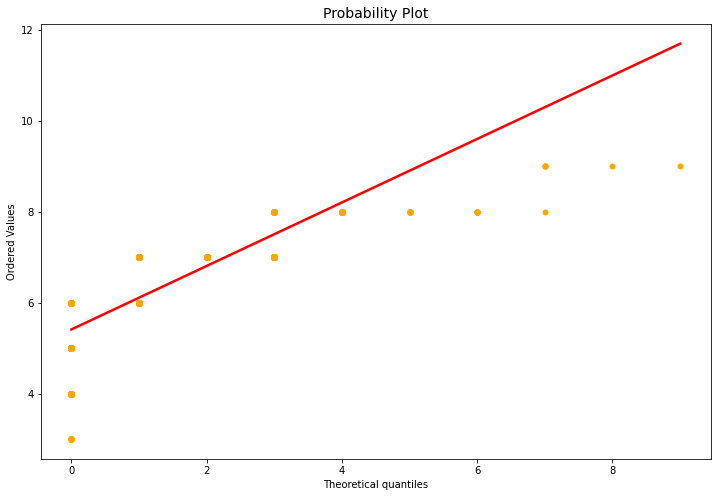

In [14]:
import pylab
import scipy.stats as stats

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
res = stats.probplot(wine_df['quality'], dist= stats.distributions.planck(lambda_=1), plot=pylab)
plt.title('Probability Plot', fontsize=14)
ax.get_lines()[0].set_marker('o')
ax.get_lines()[0].set_markerfacecolor('orange')
ax.get_lines()[0].set_markeredgecolor('orange')
ax.get_lines()[0].set_markersize(5)

ax.get_lines()[1].set_linewidth(2.5)

plt.show()

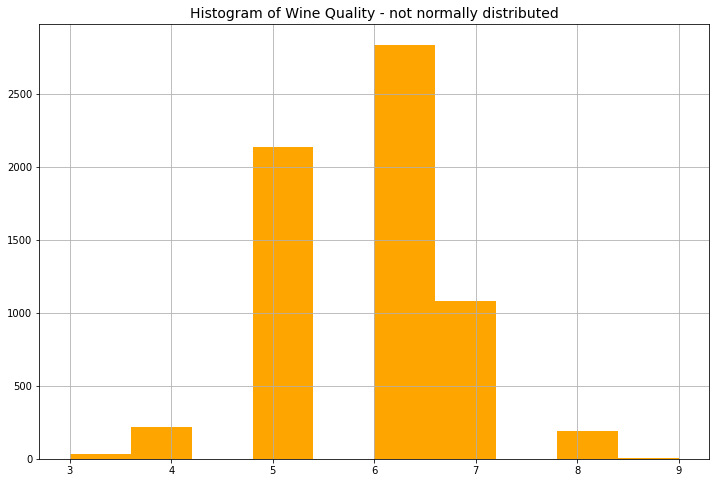

In [15]:
plt.figure(figsize=(12,8))
wine_df['quality'].hist(color='orange')
plt.title('Histogram of Wine Quality - not normally distributed', fontsize=14)
plt.show()

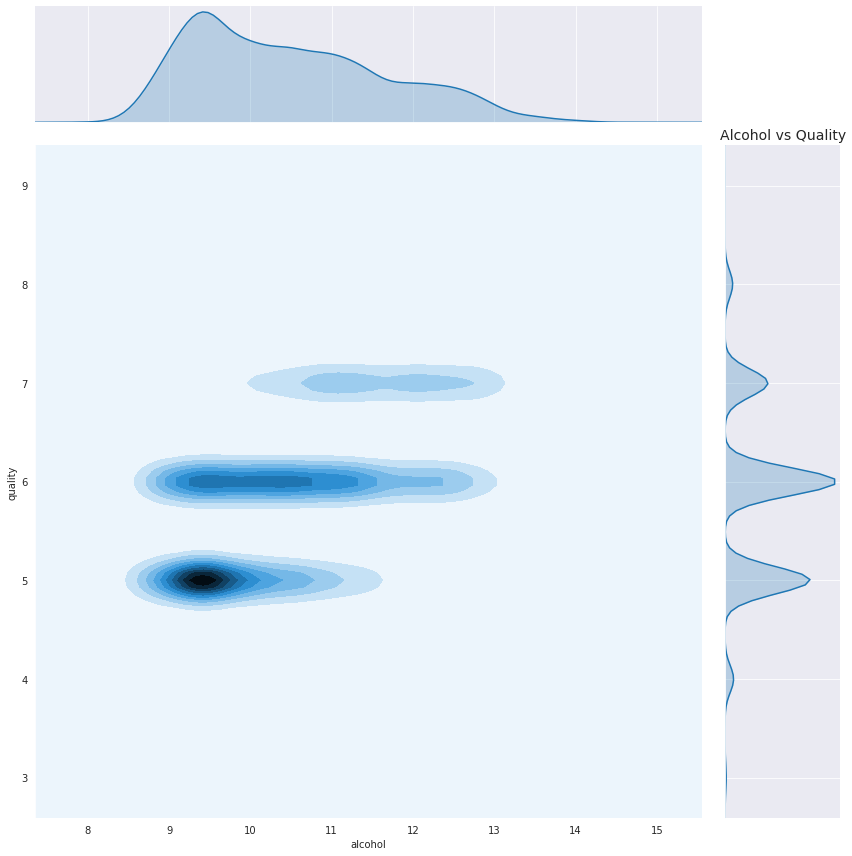

In [16]:
sns.set_style('darkgrid')
sns.jointplot(y='quality', x='alcohol', 
              data = wine_df, height=12, kind='kde')
plt.title('Alcohol vs Quality', fontsize=14)
plt.show()

Plotted Alcohol vs Quality as they have the highest correlation. You can see that most instances fall within the 5, 6 and 7 quality band. It is likely that the model will reproduce this data quirk, another reason why classification may be a better option. For now, lets continue with this in.  




---
# Prepare Data for Machine Learning
---


All the data is numerical apart from Wine Colour, which is what was created earlier. I will change this using a Sci-Kit learn and Scale the numerical features within the same pipeline. 


#### Split into Train, Test and Valid
But first, lets start by splitting the data but maintain the number of wines in each sample by splitting the alcohol into 5 different buckets. Using the plots below to help determine the bucket sizes.

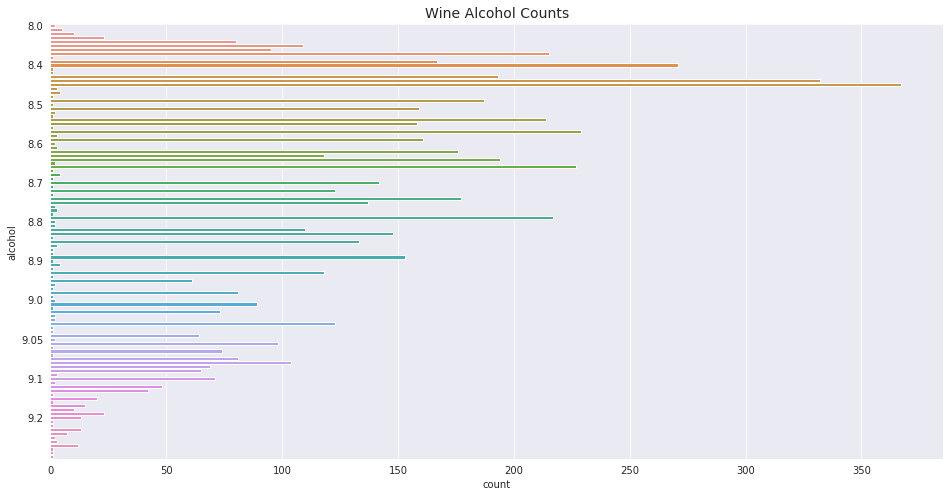

In [17]:
fig, axs = plt.subplots(figsize=(16,8), ncols=1)
plot = sns.countplot(y='alcohol', data=wine_df, ax=axs)
plot.axes.set_title("Wine Alcohol Counts",fontsize=14)
axs.set(yticks=range(0, 110,10))
plt.show()

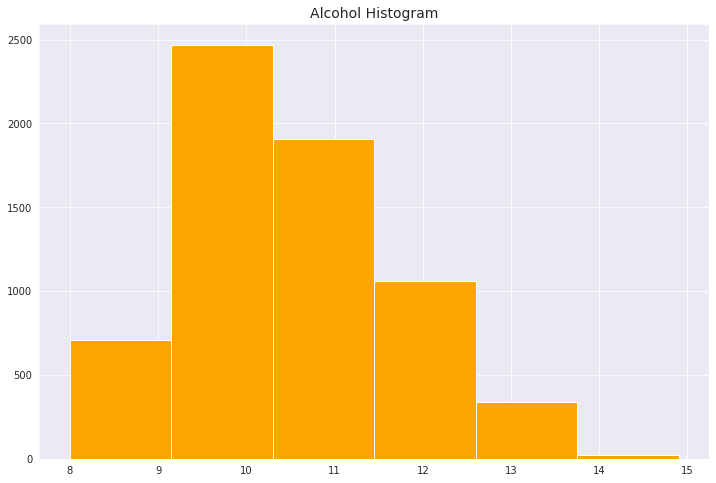

In [18]:
plt.figure(figsize=(12,8))
wine_df['alcohol'].hist(bins=6, color='orange')
plt.title('Alcohol Histogram', fontsize=14)
plt.show()

The alcohol values seem to only range from 8.0 to 15.0. From my knowledge of wines, this is fairly typical. I suggest splitting this into 4 small buckets, justified by the histogram plot based on the 4 buckets below. 

In [19]:
min_value = wine_df['alcohol'].min()
max_value = wine_df['alcohol'].max()
buckets = 4

bucket_size= (max_value-min_value)/(buckets)

print('Min Value of Alcohol: ', min_value)
print('Max Value of Alcohol: ', max_value)
print()
print('Approx Bucket Size: {:.2f}'.format(bucket_size))


Min Value of Alcohol:  8.0
Max Value of Alcohol:  14.9

Approx Bucket Size: 1.73


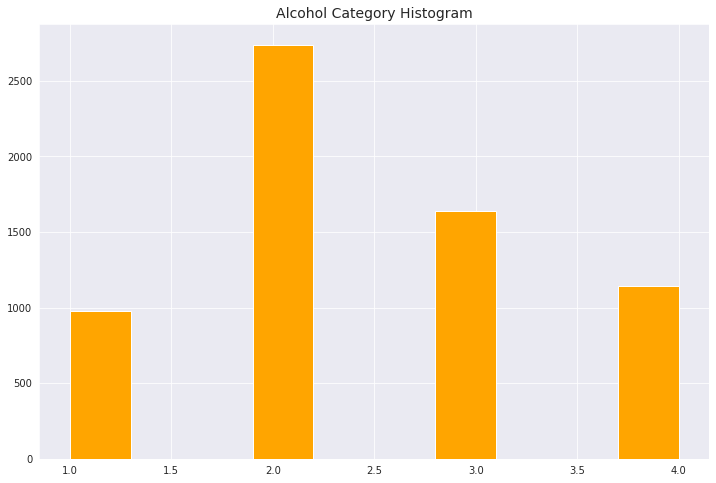

In [20]:
wine_df["alcohol_cat"] = pd.cut(wine_df["alcohol"],
                               bins=[7.9, 9.25, 10.5, 11.75, np.inf],
                               labels=[1, 2, 3, 4,])
wine_df["alcohol_cat"].value_counts()
plt.figure(figsize=(12,8))
wine_df["alcohol_cat"].hist(color='orange')
plt.title('Alcohol Category Histogram', fontsize=14)
plt.show()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

ss_split = StratifiedShuffleSplit(random_state=42, test_size=0.2, n_splits=1)

for train_idx, test_val_idx in ss_split.split(wine_df, wine_df['alcohol_cat']):
    strat_train_set = wine_df.iloc[train_idx]
    strat_test_val_set = wine_df.iloc[test_val_idx]

ss_split = StratifiedShuffleSplit(random_state=42, test_size=0.5, n_splits=1)

for test_idx, val_idx in ss_split.split(strat_test_val_set, strat_test_val_set['quality']):
    strat_test_set = strat_test_val_set.iloc[test_idx]
    strat_val_set = strat_test_val_set.iloc[val_idx]

Adds up, we have not lost any data and all the splits and now equal amongst the 4 bins. 

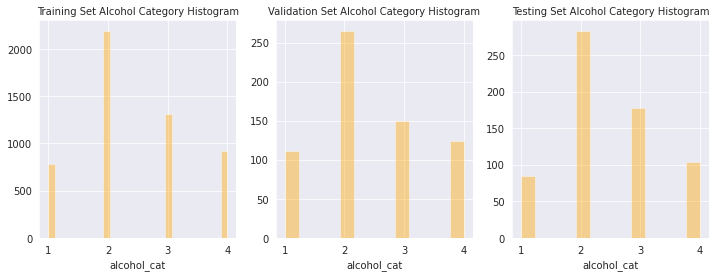

In [22]:
fig, axs = plt.subplots(ncols=3, figsize=(12,4))

sns.distplot(strat_train_set["alcohol_cat"], color='orange', ax=axs[0], kde=False)
axs[0].set_title('Training Set Alcohol Category Histogram', fontsize=10)

sns.distplot(strat_val_set["alcohol_cat"], color='orange', ax=axs[1], kde=False)
axs[1].set_title('Validation Set Alcohol Category Histogram', fontsize=10)

sns.distplot(strat_test_set["alcohol_cat"], color='orange', ax=axs[2], kde=False)
axs[2].set_title('Testing Set Alcohol Category Histogram', fontsize=10)
plt.show()

#I am sure there is a less verbose way to do this - let me know!

We can clearly see that the all the train, validation and testing set contain a similiar distribution of samples which prevents bias between the sets. This is preferred approach compared to simple random sampling, especially with a small dataset like this one. 

Before we prepare the data for machine learning we need to remove the alcohol_cat column from the data. 

#### Label Encoding and Numerical Encoding

Build a column transformer to preprocess all the numerical attributes and categorical attributes in one step. 

_We will then use this part for the finished pipeline with both the preparation and prediction in one step._

In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

X_train = strat_train_set.drop(columns=['quality','alcohol_cat'], axis=1)
y_train = strat_train_set['quality']
cat_attr = ['wine_colour']
num_attr = [name for name in strat_train_set.drop(columns= ['quality', 'alcohol_cat'], axis=1).columns if name not in cat_attr]

#create a pipeline that transforms entire data
data_transform = ColumnTransformer([
    ('num', StandardScaler(), num_attr),
    ('cat', OneHotEncoder(drop= 'first'), cat_attr)
])

X_train = data_transform.fit_transform(X_train)

X_valid = data_transform.transform(strat_val_set.drop(columns=['quality', 'alcohol_cat'], axis=1))
y_valid = strat_val_set['quality']

X_test = data_transform.transform(strat_test_set.drop(columns=['quality', 'alcohol_cat'], axis=1))
y_test = strat_test_set['quality']

---


# Model Selection

---





I will experiement with the following machine learning models:
- **SVM**
  
  *start with a baseline model as explained by: https://towardsdatascience.com/boosting-showdown-scikit-learn-vs-xgboost-vs-lightgbm-vs-catboost-in-sentiment-classification-f7c7f46fd956*

- **XGBoost Random Forest Classifier**
- **XGBoost Classifier**

  *Note: "[...] XGBoost runs more than 10x faster than scikit-learn.", as stated on https://arxiv.org/abs/1603.02754, allows a model that is more scalable model and uses minimal amount of resources. Hence, why I opted to use XGboost implemenation rather than scikit-learn's. *



## SVM

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

svc = SVC()

params_grid = {}#'kernel' : ['rbf'], 'degree': [1], 'C': [3,], 'epsilon': [0.3]}
#the search has been reduced on this notebook but numerous values were searched 

grid_svc = GridSearchCV(svc, params_grid, n_jobs=-1, cv=3)
grid_svc.fit(X_train, y_train)


svc_accuracy = accuracy_score(y_valid, grid_svc.predict(X_valid))
print('Training Score: ', accuracy_score(y_train, grid_svc.predict(X_train)))
print('Validation Score: ', svc_accuracy)

Training Score:  0.6041947277275351
Validation Score:  0.5769230769230769


## XGBoost Classifier

In [25]:
from xgboost import XGBClassifier
from xgboost.callback import print_evaluation

#I performed some hyper parameter tuning
param_dist = {'objective':'multi:softmax', 'booster': 'dart', 'normalize_type': 'forest', 'tree_method': 'exact',
              'num_class':7,'min_child_weight': 5, 'eta': 0.6, 'max_depth': 6, 
              'n_jobs':-1,  'random_state':42, 'verbosity': 1} 
#other parameters used
# 'lambda': 50, 'alpha': 0.00001, 'learning_rate':0.09,
xgb_clf = XGBClassifier(**param_dist)

xgb_clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid),],
        eval_metric=['mlogloss', 'merror'], #see XGBoost Parameters section
        early_stopping_rounds= 20,
        callbacks= [print_evaluation(period=5)],
        verbose=False)

xgb_clf_accuracy = accuracy_score(y_valid, xgb_clf.predict(X_valid))
print('Training Score: ', accuracy_score(y_train, xgb_clf.predict(X_train)))
print('Validation Score: ', xgb_clf_accuracy)

[0]	validation_0-mlogloss:1.82176	validation_0-merror:0.397345	validation_1-mlogloss:1.82896	validation_1-merror:0.453846
[5]	validation_0-mlogloss:1.42626	validation_0-merror:0.363094	validation_1-mlogloss:1.47048	validation_1-merror:0.421538
[10]	validation_0-mlogloss:1.20431	validation_0-merror:0.338464	validation_1-mlogloss:1.28432	validation_1-merror:0.424615
[15]	validation_0-mlogloss:1.06467	validation_0-merror:0.326535	validation_1-mlogloss:1.1743	validation_1-merror:0.426154
[20]	validation_0-mlogloss:0.970689	validation_0-merror:0.315374	validation_1-mlogloss:1.1033	validation_1-merror:0.421538
[25]	validation_0-mlogloss:0.898468	validation_0-merror:0.304022	validation_1-mlogloss:1.05571	validation_1-merror:0.412308
[30]	validation_0-mlogloss:0.844237	validation_0-merror:0.292284	validation_1-mlogloss:1.02319	validation_1-merror:0.416923
[35]	validation_0-mlogloss:0.805202	validation_0-merror:0.282086	validation_1-mlogloss:0.999762	validation_1-merror:0.410769
[40]	validation

Although, the model performed better than the SVC, with a bit of (manual) hyper parameter tuning the model was able to perform marginally better. I suggest a random forest so we can tune the number of estimators may result in the better validation score.

#### WIP - future work

In [26]:
# Problems running this cell. My preferred approach would be to keep training using XGBoost. 
"""The problem with the approach below is that the classification does not start at 0 (technically it does but no wine has been
scored 0, 1, 2 or 10) as wines have only been scored 3-9. To use this will involve label encoding the output values. Making
the problem more verbose than is required. I was able to use the model using the sci-kit learn."""
# OneHotEncoder().fit_transform(np.array(y_train).reshape(-1, 1))
# #using https://datascience.stackexchange.com/questions/16342/unbalanced-multiclass-data-with-xgboost

# weights = min(y_train.value_counts(normalize=True))/y_train.value_counts(normalize=True)
# dict(weights)

# from xgboost import DMatrix
# from xgboost import train

# X_train_xgb = DMatrix(X_train, label= y_train)
# X_valid_xgb = DMatrix(X_valid, label= y_valid)

# weight = weights

# forest_params = {'max_depth' : 3,
#               #   'n_estimators' : 300,
#                  'num_parallel_tree' : 200,
#                  'eta' : 0.1,
#                  'objective' : 'multi:softprob',
#                  'num_class' : 7,
#                  'random_state' : 42,
#                  'verbosity' : 1,
#                  'n_jobs' : -1,
#                 }

# num_round=10
# watchlist= [(X_train_xgb, 'train'), (X_valid_xgb, 'valid')]

# bst_model = train(params= forest_params,
#                   dtrain= X_train_xgb,
#                   num_boost_round=num_round,
#                   evals= watchlist,
#                  callbacks= [print_evaluation(period=15)],
#                  verbose_eval= 5)

# accuracy_score(y_valid, xgb_class.predict(X_valid))

'The problem with the approach below is that the classification does not start at 0 (technically it does but no wine has been\nscored 0, 1, 2 or 10) as wines have only been scored 3-9. To use this will involve label encoding the output values. Making\nthe problem more verbose than is required. I was able to use the model using the sci-kit learn.'

## Random Forest XGBoost Classifier using Sckit Learn's OneVsRestClassifier

Training Score 0.885

Validation Score 0.665

In [27]:
from xgboost import XGBRFClassifier
from sklearn.multiclass import OneVsRestClassifier

#start with defaul values of XG Random Forest Classifier
forest_params = {'max_depth' : 50,
                 'n_estimators' : 450,
                  'num_parallel_tree' : 500,
                 'subsample' : 0.75,
                 'gamma' : 0,
                 'colsample_bynode':1,
                 'lambda':0,
                 'objective' : 'binary:logistic',
                 'min_child_weight' : 1,
                 'random_state' : 42,
                 'verbosity' : 1,
                 'n_jobs' : -1,
                }

xgb_forest = XGBRFClassifier(**forest_params)
xgb_class = OneVsRestClassifier(xgb_forest)

xgb_class.fit(X_train, y_train)

xgb_sci_accuracy = accuracy_score(y_valid, xgb_class.predict(X_valid))
print('Training Score', accuracy_score(y_train, xgb_class.predict(X_train)))
print('Validation Score', xgb_sci_accuracy)

Training Score 0.8845487781412353
Validation Score 0.6646153846153846


## XGBoost Random Forest Classifier

Training Score 0.914

Validation Score 0.652



In [28]:
from sklearn.utils.class_weight import compute_class_weight

ratio= white_df['quality'].value_counts(normalize= True)
scaled_output_weights = compute_class_weight(class_weight=dict(ratio.sort_index()), classes= np.unique(y_train), y= y_train)
scaled_output_weights

array([0.0040833 , 0.03327889, 0.29746835, 0.44875459, 0.17966517,
       0.03572887, 0.00102082])

In [29]:
forest_params = {'max_depth' : 20,
                  'n_estimators' : 400,
                 'learning_rate' : 0.2,
                  'num_parallel_tree' :100,
                 'colsample_bynode' : 0.75, 
                # 'weights' : scaled_output_weights,
                  'gamma' : 0.001,
                  'base_score': 5.5,
                  'subsample' : 1,
                  'objective' : 'multi:softmax',
                  'num_class' : 7,
#                  'min_child_weight' : 1,
                 'random_state' : 42,
                 'verbosity' : 0,
                 'n_jobs' : -1,
                }

xgb_clf = XGBRFClassifier(**forest_params)

xgb_clf.fit(X_train, y_train,
        eval_set=[(X_valid, y_valid),],
        eval_metric=['merror'], #see XGBoost Parameters section
        early_stopping_rounds= 50,
        callbacks= [print_evaluation(period=5)],
        verbose=False,)

xgb_clf_accuracy_forest = accuracy_score(y_valid, xgb_clf.predict(X_valid))
print('Training Score', accuracy_score(y_train, xgb_clf.predict(X_train)))
print('Validation Score', xgb_clf_accuracy_forest)

[0]	validation_0-merror:0.347692
Training Score 0.9134115836059264
Validation Score 0.6523076923076923


# Over Sampling Methods
None of the models are performing well and some are significantly overfitting, even with a bit of tuning! Before changing the labels to 3 different classes lets try using a few over sampling methods. I experimented with:

- Synthetic Minority Over-Sampling (SMOTE)
- Adaptive Synthetic (ADASYN)
- Combination of over- and under-sampling method - SMOTE and Tomek links

The data is biased against wines that are rated 5 and 6. Using the 'not majority' sampling strategy, increases all the minority labelled data and matches it to the count of the highest count label.

## SMOTE

Further details can be found in this paper: https://arxiv.org/pdf/1106.1813.pdf 

In [30]:
from imblearn.over_sampling import SMOTE #pip install -U imbalanced-learn

#using Issue #27
#https://github.com/scikit-learn-contrib/imbalanced-learn/issues/27#issuecomment-400677092
smote = SMOTE(sampling_strategy='not majority',
             random_state=42, n_jobs=-1,k_neighbors=1)


#using Issue #31
#https://github.com/scikit-learn-contrib/imbalanced-learn/issues/31#issuecomment-181393205
X_train_res, y_train_res = smote.fit_sample(np.asarray(X_train),
                                            np.asarray(y_train))

print(X_train_res.shape)
print(X_train.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

(16016, 12)
(5197, 12)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [31]:
print('Before SMOTE:')
print(y_train.value_counts())
print()
print('After SMOTE:')
print(np.unique(y_train_res, return_counts=True))

Before SMOTE:
6    2288
5    1684
7     861
4     175
8     160
3      26
9       3
Name: quality, dtype: int64

After SMOTE:
(array([3, 4, 5, 6, 7, 8, 9]), array([2288, 2288, 2288, 2288, 2288, 2288, 2288]))


The training data has increased and now there are 2,288 9/10 ranked wines so lets see how the best model performs based on the SMOTE modified dataset. 

In [32]:
forest_params = {'max_depth' : 15,
                  'n_estimators' : 400,
                 'learning_rate' : 0.2,
                  'num_parallel_tree' :100,
                 'colsample_bynode' : 0.75, 
                  'gamma' : 0.001,
                  'base_score': 5.5,
                  'subsample' : 1,
                  'objective' : 'multi:softmax',
                  'num_class' : 7,
                 'random_state' : 42,
                 'verbosity' : 0,
                 'n_jobs' : -1,
                }

xgb_clf = XGBRFClassifier(**forest_params)

xgb_clf.fit(X_train_res, y_train_res,
        eval_set=[(X_train, y_train),(X_valid, y_valid)],
        eval_metric=['merror'], #see XGBoost Parameters section
        early_stopping_rounds= 50,
        callbacks= [print_evaluation(period=5)],
        verbose=False,)

xgb_clf_accuracy_SMOTE = accuracy_score(y_valid, xgb_clf.predict(X_valid))
print('Training Score', accuracy_score(y_train, xgb_clf.predict(X_train)))
print('Validation Score', xgb_clf_accuracy_SMOTE)

[0]	validation_0-merror:0.078892	validation_1-merror:0.396923
Training Score 0.9211083317298442
Validation Score 0.6030769230769231


Keeping the parameters the same as the best performing model, we observe not much improvement on the validation score and we are overfitting the data set massively.

Lets try using ADASYN. 

## ADASYN 

More detail on ADASYN can be found here: https://towardsdatascience.com/adasyn-adaptive-synthetic-sampling-method-for-imbalanced-data-602a3673ba16 


*The major difference between SMOTE and ADASYN is the difference in the generation of synthetic sample points for minority data points. In ADASYN, we consider a density distribution rₓ which thereby decides the number of synthetic samples to be generated for a particular point, whereas in SMOTE, there is a uniform weight for all minority points.*

In [33]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(sampling_strategy='not majority',
             random_state=42, n_jobs=-1,n_neighbors=2)

X_train_ada, y_train_ada = adasyn.fit_resample(X_train, y_train)

xgb_clf = XGBRFClassifier(**forest_params)

xgb_clf.fit(X_train_ada, y_train_ada,
        eval_set=[(X_train, y_train),(X_valid, y_valid)],
        eval_metric=['merror'], #see XGBoost Parameters section
        early_stopping_rounds= 50,
        callbacks= [print_evaluation(period=5)],
        verbose=False,)

xgb_clf.evals_result()

xgb_clf_accuracy_ADA = accuracy_score(y_valid, xgb_clf.predict(X_valid))
print('Training Score', accuracy_score(y_train, xgb_clf.predict(X_train)))
print('Validation Score', xgb_clf_accuracy_ADA)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

[0]	validation_0-merror:0.07081	validation_1-merror:0.403077
Training Score 0.9291899172599577
Validation Score 0.5969230769230769


## SMOTE and cleaning using Tomek links


In [34]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(sampling_strategy='all',
             random_state=42, smote=SMOTE(k_neighbors=2)) 

X_train_stomek, y_train_stomek = smote_tomek.fit_resample(X_train, y_train)

xgb_clf = XGBRFClassifier(**forest_params)

xgb_clf.fit(X_train_stomek, y_train_stomek,
        eval_set=[(X_train, y_train),(X_valid, y_valid)],
        eval_metric=['merror'], #see XGBoost Parameters section
        early_stopping_rounds= 50,
        callbacks= [print_evaluation(period=5)],
        verbose=False,)

xgb_clf.evals_result()

xgb_clf_accuracy_stomek = accuracy_score(y_valid, xgb_clf.predict(X_valid))
print('Training Score', accuracy_score(y_train, xgb_clf.predict(X_train)))
print('Validation Score', xgb_clf_accuracy_stomek)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

[0]	validation_0-merror:0.098903	validation_1-merror:0.403077
Training Score 0.9010967866076582
Validation Score 0.5969230769230769


# Changing the Problem
The over sampling methods did not improve the performance of the models, even with a bit of tuning. 

The next step will be changing the labels so that we have low, medium and high quality wines so that the labels are:
- 5 $\leq$ = Low
- 6 = Medium
- 7 $\geq$ High.




In [35]:
wine_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [36]:
def fix_quality(x):
  if x<= 5:
    return 0
  if x == 6:
    return 1
  else:
    return 2

In [37]:
wine_df['quality_class'] = wine_df['quality'].apply(fix_quality)
wine_df.drop(columns='quality', inplace= True)
wine_df['quality_class'].value_counts()

1    2836
0    2384
2    1277
Name: quality_class, dtype: int64

In [38]:
y_test = y_test.apply(fix_quality,)
y_train = y_train.apply(fix_quality,)
y_valid = y_valid.apply(fix_quality,)

# Model Selection (Continued)

The best model previously was XGRFBClassifier so lets see how well that performs. 

Lets also train other models such as: Scikit Learn's AdaBoost, Neural Networks and DESlib.



## XGBRFClassifier

In [39]:
forest_params = {'max_depth' :15,
                  'n_estimators' : 100,
                 'learning_rate' : 0.8,
                  'num_parallel_tree' :300,
                 'colsample_bynode' : 0.8, 
                  'gamma' : 0.5,
                  'base_score': 1,
                  'subsample' : 0.8,
                  'objective' : 'multi:softmax',
                  'num_class' : 3,
                  'min_child_weight' : 0.01,
                 'random_state' : 42,
                 'verbosity' : 0,
                 'n_jobs' : -1,
                }

xgb_clf = XGBRFClassifier(**forest_params)

xgb_clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train),(X_valid, y_valid)],
        eval_metric=['merror'], #see XGBoost Parameters section
        early_stopping_rounds= 50,
        callbacks= [print_evaluation(period=5)],
        verbose=False,)

xgb_clf_accuracy_forest = accuracy_score(y_valid, xgb_clf.predict(X_valid))
print('Training Score', accuracy_score(y_train, xgb_clf.predict(X_train)))
print('Validation Score', xgb_clf_accuracy_forest)

[0]	validation_0-merror:0.020396	validation_1-merror:0.270769
Training Score 0.9796036174716183
Validation Score 0.7292307692307692


## Scikit Learn's AdaBoost


In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(n_estimators= 100, random_state=42,
                             base_estimator= DecisionTreeClassifier(max_depth=7))

ada_clf.fit(X_train, y_train)

ada_clf_accuracy = accuracy_score(y_valid, ada_clf.predict(X_valid))
print('Training Score', accuracy_score(y_train, ada_clf.predict(X_train)))
print('Validation Score', ada_clf_accuracy)

Training Score 0.9597844910525303
Validation Score 0.6846153846153846


## Neural Network

Note: changed batch size as this has the biggest affect on the network's performance but this slows down training.  I also used SELU with LeCun's normal as an initializer and use the 'baggy jeans rather than tight', i.e. more layers and neurons tends to give better performance than trying to find the optimal sized neural network. 

In [41]:
input_shape= X_train.shape[1]

In [42]:
from tensorflow import keras
import tensorflow as tf

tf.random.set_seed(42)


model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    keras.layers.Dense(300, activation= keras.activations.selu, kernel_initializer= 'lecun_normal'),
    keras.layers.Dense(300, activation= keras.activations.selu, kernel_initializer= 'lecun_normal'),
    keras.layers.Dense(300, activation= keras.activations.selu, kernel_initializer= 'lecun_normal'),
    keras.layers.Dense(300, activation= keras.activations.selu, kernel_initializer= 'lecun_normal'),
    keras.layers.Dense(10, activation= keras.activations.selu, kernel_initializer= 'lecun_normal'),
    keras.layers.Dense(3, activation= keras.activations.softmax)
])

model.compile(loss= keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'],
             optimizer='nadam')
model_history = model.fit(X_train, y_train, epochs=100, batch_size=8,
                         validation_data=(X_valid, y_valid),
                         callbacks=[keras.callbacks.EarlyStopping(patience=20)])


Epoch 1/100
650/650 [==============================] - 3s 4ms/step - loss: 1.1052 - accuracy: 0.5072 - val_loss: 1.1399 - val_accuracy: 0.4954
Epoch 2/100
650/650 [==============================] - 3s 4ms/step - loss: 0.9346 - accuracy: 0.5420 - val_loss: 0.9573 - val_accuracy: 0.5569
Epoch 3/100
650/650 [==============================] - 3s 4ms/step - loss: 0.9003 - accuracy: 0.5617 - val_loss: 0.8680 - val_accuracy: 0.5615
Epoch 4/100
650/650 [==============================] - 3s 4ms/step - loss: 0.8727 - accuracy: 0.5782 - val_loss: 0.8496 - val_accuracy: 0.5523
Epoch 5/100
650/650 [==============================] - 3s 4ms/step - loss: 0.8491 - accuracy: 0.5780 - val_loss: 0.8417 - val_accuracy: 0.5908
Epoch 6/100
650/650 [==============================] - 3s 4ms/step - loss: 0.8231 - accuracy: 0.5963 - val_loss: 0.8199 - val_accuracy: 0.5985
Epoch 7/100
650/650 [==============================] - 3s 4ms/step - loss: 0.8132 - accuracy: 0.6044 - val_loss: 0.8084 - val_accuracy: 0.5923

In [43]:
SNN_accuracy = accuracy_score(y_valid, np.argmax(model.predict(X_valid), axis=1))
print('Training Score', accuracy_score(y_train, np.argmax(model.predict(X_train), axis=1)))
print('Validation Score', SNN_accuracy)

Training Score 0.843178756975178
Validation Score 0.6476923076923077


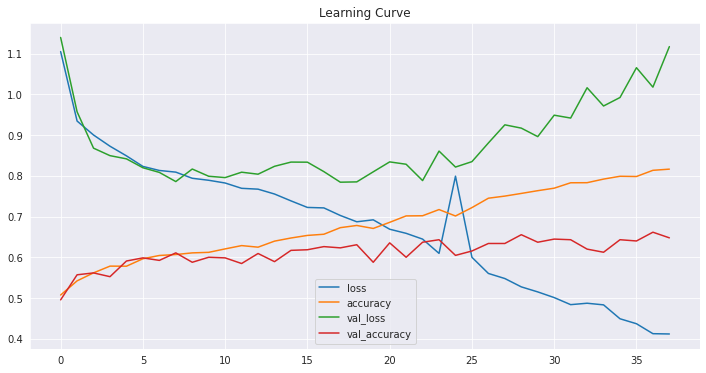

In [44]:
pd.DataFrame(model_history.history).plot(figsize= (12, 6), title='Learning Curve')


Plotting the learning curves we can see that the model is currently overfitting the training data. 

## DesLib 
Is a libary where the model selects an ensemble of classifiers rather than a single one. All base classifiers that attain a minimum competence level are selected to compose the ensemble of classifiers.

In reality, DESLib is best used when each model is an expert at classifiying each class. I have used existing trained models (earlier in the notebook) to build this ensemble model.

In [45]:
pip install deslib 

     |████████████████████████████████| 153kB 3.4MB/s 


In [46]:
grid_svc.fit(X_train, y_train)


svc_accuracy = accuracy_score(y_valid, grid_svc.predict(X_valid))
print('Training Score: ', accuracy_score(y_train, grid_svc.predict(X_train)))
print('Validation Score: ', svc_accuracy)

Training Score:  0.6584568020011545
Validation Score:  0.6169230769230769


In [47]:
from deslib.des.des_mi import DESMI

#input other classified 
desmi = DESMI(pool_classifiers=[xgb_clf, ada_clf, grid_svc])


desmi.fit(X_train, y_train)

desmi_accuracy = accuracy_score(y_valid, desmi.predict(X_valid))
print('Training Score', accuracy_score(y_train, desmi.predict(X_train)))
print('Validation Score', desmi_accuracy)

/usr/local/lib/python3.6/dist-packages/deslib/des/des_mi.py:141: RuntimeWarning: overflow encountered in exp
  weight = 1. / (1 + np.exp(self.alpha * num))
/usr/local/lib/python3.6/dist-packages/deslib/des/des_mi.py:141: RuntimeWarning: overflow encountered in exp
  weight = 1. / (1 + np.exp(self.alpha * num))


Training Score 0.6584568020011545
Validation Score 0.6169230769230769


## Plot Best Model based on Validation Data 

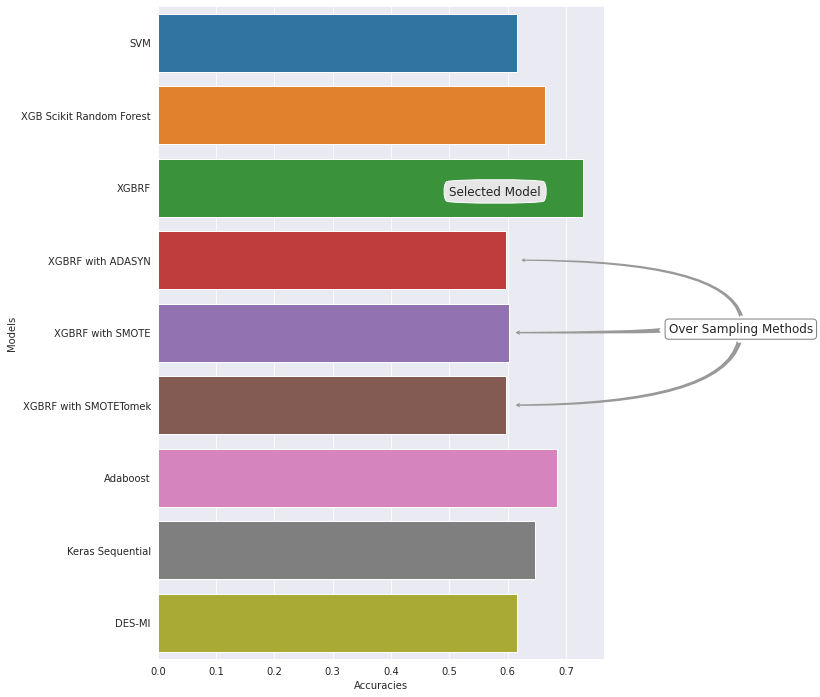

In [48]:
accuracies = {'SVM' : svc_accuracy,
              'XGB Scikit Random Forest': xgb_sci_accuracy,
              'XGBRF' : xgb_clf_accuracy_forest,
              'XGBRF with ADASYN' : xgb_clf_accuracy_ADA,
              'XGBRF with SMOTE' : xgb_clf_accuracy_SMOTE,
              'XGBRF with SMOTETomek' : xgb_clf_accuracy_stomek,
              'Adaboost' : ada_clf_accuracy,
              'Keras Sequential': SNN_accuracy,
              'DES-MI' : desmi_accuracy}

model_accuracies = pd.DataFrame(accuracies.items(), columns=['Models', 'Accuracies'])

fig, ax = plt.subplots(figsize=(8, 12))

sns.barplot(ax= ax, y= 'Models', x='Accuracies', data= model_accuracies,)
ax.annotate('Over Sampling Methods', xy=(0.61,5), xytext=(1, 4), ha='center', fontsize=12,
             arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=-90,angleB=0"),
            bbox=dict(boxstyle="round", fc="none", ec="gray"),)
ax.annotate(' ', xy=(0.61,4), xytext=(0.87, 4), ha='left', fontsize=12,
             arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=-90,angleB=0"))

ax.annotate(' ', xy=(0.62,3), xytext=(1, 3.95),
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=-90,angleB=0"))

ax.annotate('Selected Model', xy=(0.5, 2.1), fontsize=12, 
            xytext=(0.5, 2.1),# textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
           )# arrowprops=dict(arrowstyle="->",
            #                connectionstyle="angle,angleA=0,angleB=80,rad=20"))
plt.show()

The XGBoost Random Forest Model has performed the best, based on the manual tuning performed. Lets perform Random Grid search and see if we can improve the performance on the validation data. Currently, the model is overfitting the Training data. 

# Fine Tune Model

In [49]:
forest_params = {
                }

xgb_clf = XGBRFClassifier(**forest_params)

xgb_clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train),(X_valid, y_valid)],
        eval_metric=['merror'], #see XGBoost Parameters section
        early_stopping_rounds= 50,
        callbacks= [print_evaluation(period=5)],
        verbose=False,)

xgb_clf_accuracy_forest = accuracy_score(y_valid, xgb_clf.predict(X_valid))
print('Training Score', accuracy_score(y_train, xgb_clf.predict(X_train)))
print('Validation Score', xgb_clf_accuracy_forest)

[0]	validation_0-merror:0.403694	validation_1-merror:0.429231
Training Score 0.5963055609005196
Validation Score 0.5707692307692308


In [50]:
from sklearn.model_selection import RandomizedSearchCV

params_grid = {
   'max_depth' :[18, 19, 20],
   'n_estimators' : [353, 355, 360],
   'learning_rate' : [1.5, 1.7, 1.9],
   'num_parallel_tree' : [105, 110, 115],
   'colsample_bynode' : [0.52, 0.55, 0.57],
   'gamma' : [0.25, 0.35, 0.45],
   'base_score': [0,1,2],
   'subsample' : [0.8, 0.83, 0.85],
   'objective' : ['multi:softmax'],
   'num_class' : [3],
   'min_child_weight' : [0.025, 0.03, 0.035],
   'random_state' : [42],
   'verbosity' : [0],
   'n_jobs' : [-1],
   'colsample_bytree' : [0.85, 0.9, 0.95],
   'colsample_bylevel' : [0.65, 0.7, 0.75]
}


search = RandomizedSearchCV(xgb_clf, param_distributions=params_grid, n_iter=20,
                            random_state=42, scoring='accuracy', n_jobs=-1, cv=7,
                            )

search.fit(X_train, y_train)
search.best_params_

{'base_score': 2,
 'colsample_bylevel': 0.65,
 'colsample_bynode': 0.57,
 'colsample_bytree': 0.85,
 'gamma': 0.25,
 'learning_rate': 1.9,
 'max_depth': 20,
 'min_child_weight': 0.035,
 'n_estimators': 355,
 'n_jobs': -1,
 'num_class': 3,
 'num_parallel_tree': 105,
 'objective': 'multi:softmax',
 'random_state': 42,
 'subsample': 0.83,
 'verbosity': 0}

In [51]:
print('Training Score', accuracy_score(y_train, search.predict(X_train)))
print('Validation Score', accuracy_score(y_valid, search.predict(X_valid)))

Training Score 0.9921108331729844
Validation Score 0.7215384615384616


# Evaluating Best Model

Apply a few regularization parameters to increase validation data score.

In [52]:
best_params = {'base_score': 2,
               'colsample_bylevel': 0.75,
               'colsample_bynode': 0.57,
               'colsample_bytree': 0.95,
               'gamma': 0.25,
               'learning_rate': 1.7,
               'max_depth': 18,
               'min_child_weight': 0.025,
               'n_estimators': 353,
               'n_jobs': -1,
               'num_class': 3,
               'num_parallel_tree': 105,
               'objective': 'multi:softmax',
               'random_state': 42,
               'subsample': 0.8,
               'verbosity': 0,
               'reg_alpha' : 0.05,
               'reg_lambda' : 1,
               'rate_drop' : 0.5}

best_xgb = XGBRFClassifier(**best_params)

best_xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train),(X_valid, y_valid)],
        eval_metric=['merror'],
        early_stopping_rounds= 50,
        callbacks= [print_evaluation(period=5)],
        verbose=False,)

[0]	validation_0-merror:0.012507	validation_1-merror:0.278462


XGBRFClassifier(base_score=2, colsample_bylevel=0.75, colsample_bynode=0.57,
                colsample_bytree=0.95, gamma=0.25, learning_rate=1.7,
                max_delta_step=0, max_depth=18, min_child_weight=0.025,
                missing=None, n_estimators=353, n_jobs=-1, nthread=None,
                num_class=3, num_parallel_tree=105, objective='multi:softprob',
                random_state=42, rate_drop=0.5, reg_alpha=0.05, reg_lambda=1,
                scale_pos_weight=1, seed=None, silent=None, subsample=0.8,
                verbosity=0)

In [53]:
from sklearn.metrics import classification_report

print('Training Data')
print(classification_report(y_pred= best_xgb.predict(X_train), y_true= y_train))
print('------------------------------------\nValidation Data')
print(classification_report(y_pred= best_xgb.predict(X_valid), y_true= y_valid))

Training Data
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1885
           1       0.99      0.99      0.99      2288
           2       0.99      0.98      0.98      1024

    accuracy                           0.99      5197
   macro avg       0.99      0.99      0.99      5197
weighted avg       0.99      0.99      0.99      5197

------------------------------------
Validation Data
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       250
           1       0.66      0.74      0.70       274
           2       0.74      0.60      0.66       126

    accuracy                           0.72       650
   macro avg       0.73      0.70      0.71       650
weighted avg       0.73      0.72      0.72       650



# Feature Engineering 

All the models so far have not performed to the objective set out, this may be due to the collinearity between features.

In [54]:
features = best_xgb.feature_importances_
sorted_features = sorted(zip(features, wine_df.columns), reverse=True)
sorted_features

[(0.19711328, 'sulphates'),
 (0.116163395, 'alcohol'),
 (0.096853495, 'total sulfur dioxide'),
 (0.07672717, 'pH'),
 (0.07634655, 'fixed acidity'),
 (0.06824528, 'free sulfur dioxide'),
 (0.068029754, 'density'),
 (0.06792571, 'chlorides'),
 (0.06683996, 'residual sugar'),
 (0.061768048, 'citric acid'),
 (0.057534896, 'volatile acidity'),
 (0.04645253, 'wine_colour')]

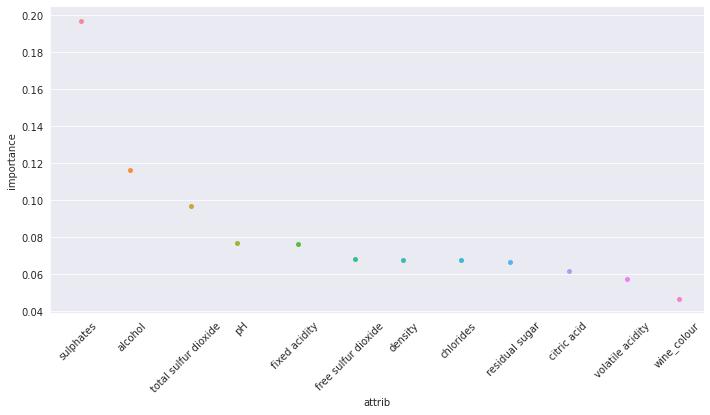

In [55]:
features_df = pd.DataFrame(sorted_features, columns=['importance', 'attrib'])
g= sns.catplot(y='importance', x= 'attrib', data= features_df, aspect=2)
g.set_xticklabels(rotation=45)
plt.show()

The features Sulphates, Alcohol, Total Sulfur Dioxide, pH, and Volatile Acidity impact the quality, the most. Lets try train a model with just the top features. 


In [56]:
len(sorted_features)

12

In [57]:
top_n_features = 10 #input the top number of features to keep
top_features = [column for i,column in sorted_features][:top_n_features]
X = wine_df[top_features]
y = wine_df['quality_class']

from sklearn.model_selection import train_test_split

#split data
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=1300, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

#create a pipeline that transforms entire data
std_scaler = StandardScaler()

X_train = std_scaler.fit_transform(X_train)
X_valid = std_scaler.transform(X_valid)
X_test = std_scaler.transform(X_test)

params_grid = {
   'max_depth' :[10, 15, 20],
   'n_estimators' : [200, 250, 300],
   'learning_rate' : [0.1, 0.3, 0.9],
   'num_parallel_tree' : [10, 30, 50],
   'gamma' : [0.13],
   'base_score': [1],
   'subsample' : [0.95],
   'objective' : ['multi:softmax'],
   'num_class' : [3],
   'min_child_weight' : [0.02],
   'random_state' : [42],
   'verbosity' : [0],
   'n_jobs' : [-1],
   'colsample_bytree' : [0.7],
   'colsample_bynode' : [0.55],
   'colsample_bylevel' : [0.7],
   'reg_alpha' : [0.30,],
   'reg_lambda' : [0.3],
   'eval_set' : [(X_train, y_train),(X_valid, y_valid)],
   'eval_metric' : ['merror'],
   'early_stopping_rounds' : [5],
}


search = RandomizedSearchCV(xgb_clf, param_distributions=params_grid, n_iter=25,
                            random_state=42, scoring='accuracy', n_jobs=-1, cv=10,
                            )

search.fit(X_train, y_train)
best_model = search.best_estimator_

print('Training Score', accuracy_score(y_train, best_model.predict(X_train)))
print('Validation Score', accuracy_score(y_valid, best_model.predict(X_valid)))

Training Score 0.9938426015008659
Validation Score 0.7169230769230769


In [58]:
best_model.get_params

<bound method XGBModel.get_params of XGBRFClassifier(base_score=1, colsample_bylevel=0.7, colsample_bynode=0.55,
                colsample_bytree=0.7, early_stopping_rounds=5,
                eval_metric='merror',
                eval_set=(array([[-0.75122123, -1.08506915,  1.13662411, ..., -0.32082382,
         0.55940196,  0.27985521],
       [-1.14846347, -0.41405807,  0.55373132, ..., -0.49711692,
        -0.79964568,  0.21093574],
       [-1.01604939, -0.24630531, -0.20579564, ...,  1....
Name: quality_class, Length: 5197, dtype: int64),
                gamma=0.13, learning_rate=0.3, max_delta_step=0, max_depth=20,
                min_child_weight=0.02, missing=None, n_estimators=300,
                n_jobs=-1, nthread=None, num_class=3, num_parallel_tree=10,
                objective='multi:softprob', random_state=42, reg_alpha=0.3,
                reg_lambda=0.3, scale_pos_weight=1, seed=None, silent=None,
                subsample=0.95, verbosity=0)>

In [59]:
best_model = search.best_estimator_
print('Training Score', accuracy_score(y_train, best_model.predict(X_train)))
print('Validation Score', accuracy_score(y_valid, best_model.predict(X_valid)))
best_model

Training Score 0.9938426015008659
Validation Score 0.7169230769230769


XGBRFClassifier(base_score=1, colsample_bylevel=0.7, colsample_bynode=0.55,
                colsample_bytree=0.7, early_stopping_rounds=5,
                eval_metric='merror',
                eval_set=(array([[-0.75122123, -1.08506915,  1.13662411, ..., -0.32082382,
         0.55940196,  0.27985521],
       [-1.14846347, -0.41405807,  0.55373132, ..., -0.49711692,
        -0.79964568,  0.21093574],
       [-1.01604939, -0.24630531, -0.20579564, ...,  1....
Name: quality_class, Length: 5197, dtype: int64),
                gamma=0.13, learning_rate=0.3, max_delta_step=0, max_depth=20,
                min_child_weight=0.02, missing=None, n_estimators=300,
                n_jobs=-1, nthread=None, num_class=3, num_parallel_tree=10,
                objective='multi:softprob', random_state=42, reg_alpha=0.3,
                reg_lambda=0.3, scale_pos_weight=1, seed=None, silent=None,
                subsample=0.95, verbosity=0)

From all the tuning performed and the feature selection we are unable to achieve a performance above 80+ for the validation set for any of the models. This will require further investigation in later work. 



---


# Data Visualisation

---



Data visualization will enable use to observe any clusters within the different wine types. Trying to seek a low-dimensional representation of the data can help establish if good quality wines can be grouped together. 

## TSNE

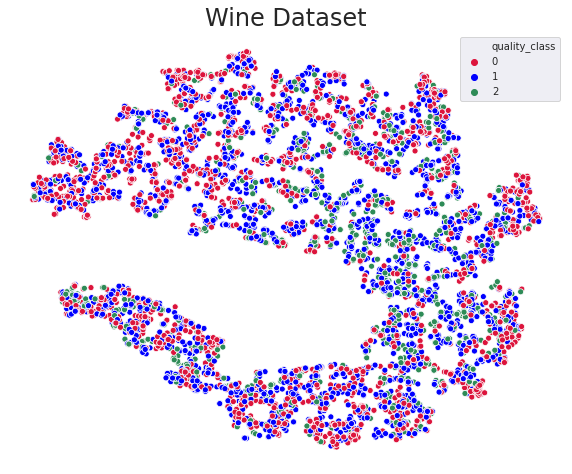

In [60]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,
            random_state=42,
            learning_rate=10,
            perplexity=50,
            early_exaggeration=30,
            n_iter=2000)
X_reduced_tsne = tsne.fit_transform(X)

plt.figure(figsize= (10,8))
plt.title('Wine Dataset', fontsize=24)
sns.scatterplot(X_reduced_tsne[:, 0],
                X_reduced_tsne[:,1],
                hue=y,
                palette=['crimson', 'blue', 'seagreen'])
plt.axis('off')
plt.show()

## PCA

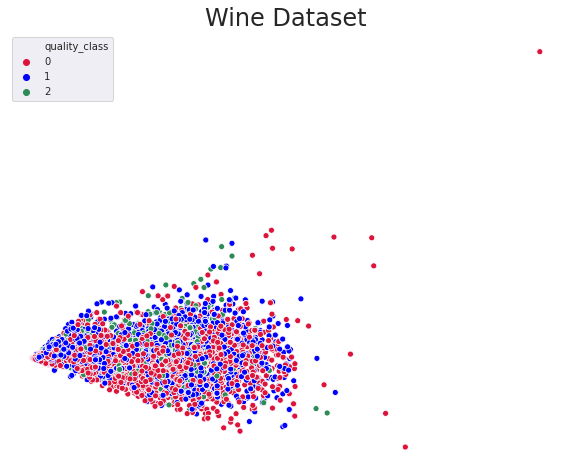

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(X) 
plt.figure(figsize= (10,8))
plt.title('Wine Dataset', fontsize=24)
sns.scatterplot(X_reduced_pca[:, 0],
                X_reduced_pca[:,1],
                hue=y,
                palette=['crimson', 'blue', 'seagreen'])
plt.axis('off')
plt.show()

## Locally Linear Embedding

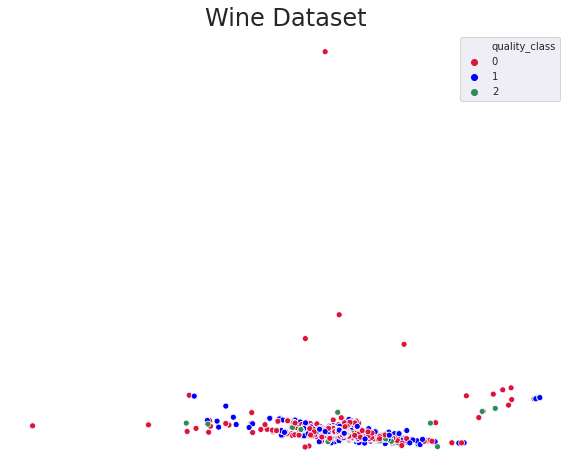

In [62]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components= 2 , random_state=42,
                             n_neighbors=6,)
X_reduced_lle = lle.fit_transform(X)
plt.figure(figsize= (10,8))
plt.title('Wine Dataset', fontsize=24)
sns.scatterplot(X_reduced_lle[:, 0],
                X_reduced_lle[:,1],
                hue=y,
                palette=['crimson', 'blue', 'seagreen'])
plt.axis('off')
plt.show()

## Multidimensional Scaling (MDS)

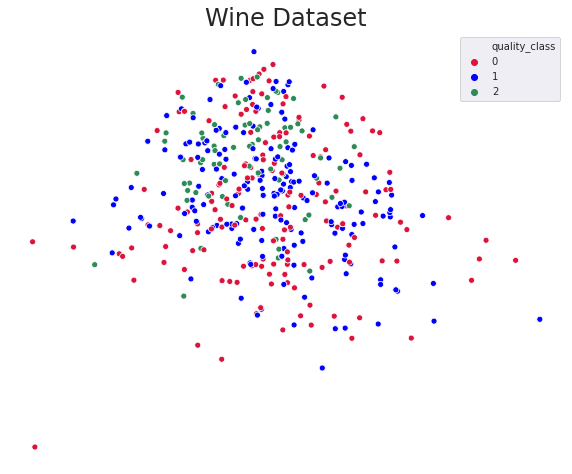

In [63]:
from sklearn.manifold import MDS

mds = MDS(n_components= 2 , random_state=42)
X_reduced_mds = mds.fit_transform(X[:500])
plt.figure(figsize= (10,8))
plt.title('Wine Dataset', fontsize=24)
sns.scatterplot(X_reduced_mds[:, 0],
                X_reduced_mds[:,1],
                hue=y[:500],
                palette=['crimson', 'blue', 'seagreen'])
plt.axis('off')
plt.show()


Clearly, there are no obvious signs of clusters amongst the wine quality.

---

# Final Test Score, Conclusion and Future Work 

---



In [64]:
print('Training Score', accuracy_score(y_train, best_model.predict(X_train)))
print('Validation Score', accuracy_score(y_valid, best_model.predict(X_valid)))

print('Test Score', accuracy_score(y_test, best_model.predict(X_test)))

Training Score 0.9938426015008659
Validation Score 0.7169230769230769
Test Score 0.7276923076923076


We can see that there is no distinct cluster even with the multiple Manifold learning techniques applied - a minor bit of parameter tuning was carried out for t-SNE and did appear to provide a more useful visualization. 

If I were an Oenologist, I would attempt to find the exact concentration of the top 10 important features. Inputting this into the model we would expect an accuracy of at least 72% and, more importantly, ~74% precision (i.e. wines that were classified 74% would be correctly classified). Conversely, recall has suffered marginally and only 70% of the wines will be identified. 

The model (plus loading, preprocessing and training) has been saved under a seperate .py file within this repo. 

## Future Work

There is a lot of potential for future work, some of which has been pointed out throughout this notebook. The obvious is a detailed study of the features. There is potential in combining and adding more features using the top features from the best model. For example, create a new feature that equals the sulphates divided by alcohol columns.

Please feel free to contact me if you have any questions or areas that I can improve in this notebook and the model created. 
